<a href="https://colab.research.google.com/github/Samudralapradeep/Air_city/blob/main/Project_Buzz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
from scipy import interpolate

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
merged_df = pd.read_csv('/content/drive/MyDrive/BuzzonEarth/Buzz/merged_final.csv')

In [ ]:
data_copy=merged_df.copy()
data_copy.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
0,2.99,NaN,6.87,23.98,NaN,NaN,0.00,4.92,5.90,0.55,0.64,NaN,8
1,1.64,2.86,0.86,2.05,0.16,2.14,0.01,3.31,0.02,0.00,0.01,NaN,8
2,NaN,NaN,0.69,2.00,0.69,2.04,0.06,2.84,NaN,0.00,0.02,NaN,9
3,NaN,0.10,NaN,96.74,NaN,28.52,NaN,5.20,8.95,NaN,NaN,NaN,9
4,NaN,0.10,NaN,88.62,NaN,26.33,NaN,4.70,8.87,NaN,NaN,NaN,9


In [ ]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 854486 entries, 0 to 854485
Data columns (total 13 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   PM2.5    810336 non-null  float64
 1   PM10     606803 non-null  float64
 2   NO       817037 non-null  float64
 3   NO2      818911 non-null  float64
 4   NOx      786295 non-null  float64
 5   NH3      609776 non-null  float64
 6   CO       813437 non-null  float64
 7   SO2      797152 non-null  float64
 8   O3       799547 non-null  float64
 9   Benzene  724546 non-null  float64
 10  Toluene  651868 non-null  float64
 11  Xylene   332725 non-null  float64
 12  AQI      854486 non-null  int64  
dtypes: float64(12), int64(1)
memory usage: 84.7 MB


In [ ]:
data_copy.isnull().sum()

,0
PM2.5,44150
PM10,247683
NO,37449
NO2,35575
NOx,68191
NH3,244710
CO,41049
SO2,57334
O3,54939
Benzene,129940


In [ ]:
def fill_with_nearest_mean(df):
    for column in df.columns:
        # Forward fill the missing values
        df[column] = df[column].fillna(method='ffill')

        # Backward fill the remaining NaN values
        df[column] = df[column].fillna(method='bfill')

        # Apply interpolation to smoothen between missing values
        df[column] = df[column].interpolate(method='linear')

    return df

In [ ]:
df_filled = fill_with_nearest_mean(df=data_copy)

<ipython-input-6-60ea30cd5125>:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[column] = df[column].fillna(method='ffill')
<ipython-input-6-60ea30cd5125>:7: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[column] = df[column].fillna(method='bfill')


In [ ]:
df_filled.isnull().sum()

,0
PM2.5,0
PM10,0
NO,0
NO2,0
NOx,0
NH3,0
CO,0
SO2,0
O3,0
Benzene,0


In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

import numpy as np

# Preprocess data
X = df_filled.drop('AQI', axis=1)
y = df_filled['AQI']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



"""array = np.array(X_train)
size_shape = array.shape  # Returns a tuple representing the dimensions
size_total = array.size   # Returns the total number of elements

# Assuming 'array' is your NumPy array
sliced_array = array[:10000]
y_train = y_train[:10000]

print("Shape of the array:", sliced_array.shape)
print("Total number of elements:", size_total)"""




#Replace 'your_data.csv' with the actual filename of your dataset.
#Adjust the n_estimators parameter in the RandomForestRegressor to control the number of decision trees in the forest.

'array = np.array(X_train)\nsize_shape = array.shape  # Returns a tuple representing the dimensions\nsize_total = array.size   # Returns the total number of elements\n\n# Assuming \'array\' is your NumPy array\nsliced_array = array[:10000]\ny_train = y_train[:10000]\n\nprint("Shape of the array:", sliced_array.shape)\nprint("Total number of elements:", size_total)'

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler

# Standardize the features (important for neural networks)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the neural network
nn_model = Sequential()
nn_model.add(Dense(128, activation='relu', input_dim=X_train_scaled.shape[1]))
nn_model.add(Dense(64, activation='relu'))
nn_model.add(Dense(32, activation='relu'))
nn_model.add(Dense(16, activation='relu'))
nn_model.add(Dense(1))  # Output layer for regression (1 output)

# Compile the model
nn_model.compile(optimizer='adam', loss='mean_absolute_error')  # Use 'mean_squared_error' for regression

# Train the neural network
history = nn_model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, verbose=1)

# Use the neural network to get the intermediate output
# This will generate a new set of features to use with RandomForest
X_train_nn_output = nn_model.predict(X_train_scaled)
X_test_nn_output = nn_model.predict(X_test_scaled)

# Now use RandomForestRegressor on top of the neural network output
rf = RandomForestRegressor(random_state=42, n_estimators=100, max_depth=10)

# Train the random forest on the neural network output
rf.fit(X_train_nn_output, y_train)

# Predict on the test set
y_pred = rf.predict(X_test_nn_output)

# Evaluate the model
mse = mean_squared_error(y_test, X_test_nn_output)
mae = mean_absolute_error(y_test, X_test_nn_output)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')


Epoch 1/50
21363/21363 [==============================] - 37s 2ms/step - loss: 39.9705
Epoch 2/50
21363/21363 [==============================] - 36s 2ms/step - loss: 37.4474
Epoch 3/50
21363/21363 [==============================] - 35s 2ms/step - loss: 36.6360
Epoch 4/50
21363/21363 [==============================] - 36s 2ms/step - loss: 35.9102
Epoch 5/50
21363/21363 [==============================] - 36s 2ms/step - loss: 35.3103
Epoch 6/50
21363/21363 [==============================] - 35s 2ms/step - loss: 34.8678
Epoch 7/50
21363/21363 [==============================] - 36s 2ms/step - loss: 34.5185
Epoch 8/50
21363/21363 [==============================] - 36s 2ms/step - loss: 34.2589
Epoch 9/50
21363/21363 [==============================] - 36s 2ms/step - loss: 34.0480
Epoch 10/50
21363/21363 [==============================] - 37s 2ms/step - loss: 33.8688
Epoch 11/50
21363/21363 [==============================] - 36s 2ms/step - loss: 33.6778
Epoch 12/50
21363/21363 [================

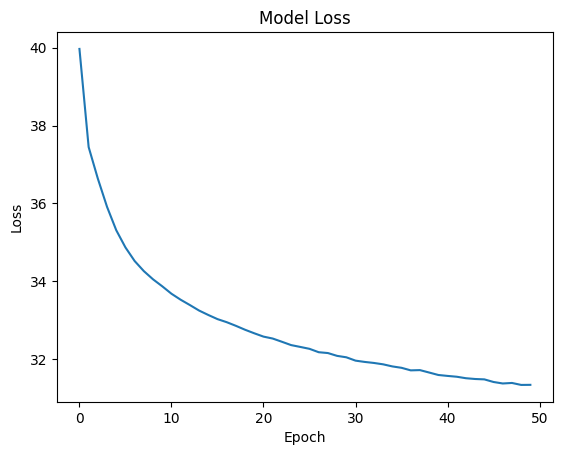

In [ ]:
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

In [ ]:
def suggest_measures(aqi):
    if aqi <= 50:
        return "Air quality is good. No actions needed."
    elif 51 <= aqi <= 100:
        return "Air quality is moderate. Reduce outdoor activities if sensitive."
    elif 101 <= aqi <= 150:
        return "Air quality is unhealthy for sensitive groups. Consider using masks."
    elif 151 <= aqi <= 200:
        return "Air quality is unhealthy. Limit outdoor exposure."
    else:
        return "Air quality is hazardous. Stay indoors, use air purifiers."

# Predict on new data (replace X_new with actual new data input)
new_data = np.array([[81.4,124.5,1.44,20.5,12.08,10.72,0.12,15.24,127.09,0.2,6.5,0.06]])  # Example input
new_data_scaled = scaler.transform(new_data)
pred = nn_model.predict(new_data_scaled)
predicted_aqi = nn_model.predict(new_data_scaled)

# Get actionable suggestions
actions = suggest_measures(predicted_aqi[0])
print(f"Predicted AQI: {predicted_aqi[0]}")
print(f"Suggested Action: {actions}")

1/1 [==============================] - 0s 22ms/step
Predicted AQI: [208.651]
Suggested Action: Air quality is hazardous. Stay indoors, use air purifiers.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
